Adding css style to the following notebook file:

In [1]:
heading = '''
h3 {
    color: white;
    background-color: black;
    padding: 0.5em;
}
'''

In [2]:
table = '''
body {
    margin: 0;
    font-family: Helvetica;
}
table.dataframe {
    border-collapse: collapse;
    border: none;
}
table.dataframe tr {
    border: none;
}
table.dataframe td, table.dataframe th {
    margin: 0;
    border: 1px solid white;
    padding-left: 0.25em;
    padding-right: 0.25em;
}
table.dataframe th:not(:empty) {
    background-color: #fec;
    text-align: left;
    font-weight: normal;
}
table.dataframe tr:nth-child(2) th:empty {
    border-left: none;
    border-right: 1px dashed #888;
}
table.dataframe td {
    border: 2px solid #ccf;
    background-color: #f4f4ff;
}
'''

In [3]:
from IPython.core.display import HTML

css = heading + table
HTML('<style>{}</style>'.format(css))

### Author: Ramprasath Karunakaran

Date written: 29/09/2016

Version: 1.0

Program: Python 2.7.12 and Jupyter notebook

In [4]:
#checking python version
!python --version

Python 2.7.12 :: Anaconda 4.1.1 (x86_64)


In [5]:
#importing required libraries
import pandas as pd
import re
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap 
import numpy as np 
import uuid
%matplotlib inline

### Loading the first dataset

In [6]:
#Reading the csv file
disaster_df = pd.read_csv("Disasters.csv",index_col=0)
disaster_df

,Start,End,Country,Location,Type,Sub_Type,Names,Killed,Affected,International support
0,1965-06-01,1965-06-01,Japan,NaN,storm,tropical cyclone,Dinah,61.0,30000.0,1934.944
1,2004-09-01,2004-09-01,Grenada,NaN,storm,tropical cyclone,Ivan,39.0,60000.0,1090.830
2,1995-03-01,1995-03-01,Russia,Kalmoukie:Daghestan (Mer ...,transport accident,water,NaN,52.0,NaN,NaN
3,1983-02-01,1983-02-01,Cuba,Santiago de Cuba:Pinar d ...,flood,NaN,NaN,15.0,164575.0,905.275
4,1996-07-01,1996-07-01,Russia,Volgorgrad,industrial accident,gas leak,Oil refinery,NaN,NaN,NaN
5,2003-06-01,2003-06-01,Turkey,Kayseri,miscellaneous accident,explosion,Dormitory of a school,10.0,13.0,824.806
6,2003-02-01,2003-02-01,Pakistan,Baluchistan:Sindh:North ...,storm,NaN,NaN,51.0,2557.0,992.690
7,1986-08-01,1986-08-01,Honduras,Northeast Honduras/Mosqui ...,flood,NaN,NaN,NaN,30000.0,NaN
8,2007-10-01,2007-10-01,Colombia,Near Suarez (Cauca),industrial accident,collapse,Cold mine,22.0,24.0,888.882
9,2002-09-01,2002-09-01,Senegal,Au large de la Gambie,transport accident,water,Ferry 'Joola',1200.0,NaN,NaN


### Loading the second dataset

In [7]:
#reading the recent disaster set to be merged
disaster_recentdf = pd.read_csv("Disasters_Recent.csv")
disaster_recentdf

,year,disaster type,Country iso; Country name,disaster group,disaster subgroup,disaster subtype,continent,region,occurrence,Total deaths,Affected,Injured,Homeless,Total affected,Total damage,International support,Unnamed: 16
0,2000,Drought,AFG,Afghanistan,Natural,Climatological,Drought,Asia,Southern Asia,1,37,2580000,0,0,2580000,50,122245.87
1,2000,Drought,ARM,Armenia,Natural,Climatological,Drought,Asia,Western Asia,1,0,297000,0,0,297000,100000,5400.00
2,2000,Drought,AZE,Azerbaijan,Natural,Climatological,Drought,Asia,Western Asia,1,0,0,0,0,0,100000,0.00
3,2000,Drought,BOL,Bolivia (Plurinational State of),Natural,Climatological,Drought,Americas,South America,1,0,20000,0,0,20000,0,0.00
4,2000,Drought,BIH,Bosnia and Herzegovina,Natural,Climatological,Drought,Europe,Southern Europe,1,0,0,0,0,0,158000,0.00
5,2000,Drought,BGR,Bulgaria,Natural,Climatological,Drought,Europe,Eastern Europe,1,0,0,0,0,0,0,0.00
6,2000,Drought,CHN,China,Natural,Climatological,Drought,Asia,Eastern Asia,3,0,20000000,0,0,20000000,796115,23500.00
7,2000,Drought,CUB,Cuba,Natural,Climatological,Drought,Americas,Caribbean,1,0,0,0,0,0,0,0.00
8,2000,Drought,CYP,Cyprus,Natural,Climatological,Drought,Asia,Western Asia,1,0,0,0,0,0,0,0.00
9,2000,Drought,GEO,Georgia,Natural,Climatological,Drought,Asia,Western Asia,1,0,696000,0,0,696000,200000,2300.00


Problems noted in the above dataframe:
> - Two column headers 'Country iso' and 'Country name' are merged into one column header 'Country iso;Country name' resulting in an unnamed column at the end of the dataframe.
- To resolve this, we are renaming the column headers.

In [8]:
disaster_recentdf.columns=['year','Type','Country iso','Country','disaster group','disaster subgroup', 'Sub_Type','continent','Location','occurrence','Killed','Affected1','Injured','Homeless','Affected','Total damage','International support']

## Comparing two dataframes before merging

When comparing two dataframes, the following columns could be mapped together.
> - 'Country' and 'country' both contain same information but the naming conventions in each dataset is different.(Example: 'United States of America' and 'United States'
- 'Type' and 'disaster type' columns holds info about disaster types.
- 'Sub_Type' and 'disaster subtype' columns contain information about disaster subtypes.
- 'Location' and 'region' can be merged because region information contains the exact location of disaster.
- 'Killed' and 'Total deaths' can be mapped as they have info about death toll.
- 'Affected' and 'Total affected' can be merged as they are the total of affected, homeless and injured.
- 'International support' in both the datasets can be mapped but we are not sure about the unit of those values.

## Possible conflicts found before merging

- Start and End columns in disaster_df will be empty after merging, as disaster_recentdf has only year of occurence.
- Country columns in both datasets as mentioned previously.

### Resolving Date conflict
We can add two new columns 'Start' and 'End' to disaster_recentdf. Since we do not have dates and months in the second dataset, we decide to set day and month to '01' 

In [9]:
#Function to build a new date string in the format yyyy-mm-dd
def convertdate(year):
    return year + '-01-01'

# Creating start and end columns and passing year values to the function
Start=disaster_recentdf.year.apply(str).apply(convertdate)
End=disaster_recentdf.year.apply(str).apply(convertdate)

In [10]:
# Concatenating the columns to the recent dataframe
disaster_recentdf=pd.concat([disaster_recentdf,Start,End], axis=1)
# Renaming the columns again with Start and End to match the columns in the original dataset
disaster_recentdf.columns=['year','Type','Country iso','Country','disaster group','disaster subgroup', 'Sub_Type','continent','Location','occurrence','Killed','Affected1','Injured','Homeless','Affected','Total damage','International support','Start','End']

### Resolving Countries conflict


In [11]:
#Extracting countries in disaster_df which are not in recent dataframe
disaster_df[~disaster_df['Country'].isin(disaster_recentdf['Country'])]

,Start,End,Country,Location,Type,Sub_Type,Names,Killed,Affected,International support
2,1995-03-01,1995-03-01,Russia,Kalmoukie:Daghestan (Mer ...,transport accident,water,NaN,52.0,NaN,NaN
4,1996-07-01,1996-07-01,Russia,Volgorgrad,industrial accident,gas leak,Oil refinery,NaN,NaN,NaN
18,2004-12-01,2004-12-01,Taiwan,South:East,storm,tropical cyclone,Nanmadol (Yoyong/30W),3.0,NaN,NaN
19,1991-02-01,1991-02-01,Soviet Union,Leningrad,miscellaneous accident,fire,Hotel,17.0,NaN,NaN
20,1910-10-01,1910-10-01,Tanzania,United Republic of Rukwa,earthquake (seismic activity),earthquake (ground shaking),NaN,NaN,NaN,NaN
23,1909-09-01,1909-09-01,United States,Louisiana,flood,storm surge/coastal flood,NaN,72.0,NaN,NaN
24,2000-05-01,2000-05-01,United States,Franklin:Jefferson count ...,flood,flash flood,NaN,2.0,2000.0,740.589
30,1987-10-01,1987-10-01,Venezuela,Near San Pedro river (Wes ...,flood,NaN,NaN,40.0,29.0,1316.482
36,1977-09-01,1977-09-01,Philippines,Basilan,transport accident,road,NaN,22.0,32.0,515.860
44,1931-08-01,1931-08-01,Philippines,West Luzon,storm,tropical cyclone,NaN,NaN,NaN,NaN


3260 rows are not matching.The problem here is choosing the correct convention among the two datasets. The first dataset's source is not given to us. The recent disaster set is imported from [EM-DAT - The International Disaster Database](http://www.emdat.be/advanced_search/index.html). Hence, it is better to follow the convention followed in the second dataset.


To implement this, we write a loop which can find the closest match in the recent dataframe and replace it in the disaster_df.

In [12]:
#iterating through countries in disaster_df which are not in recent dataframe
for i, row in disaster_df[~disaster_df['Country'].isin(disaster_recentdf['Country'])].iterrows():
    try:
# pandas value counts function provide a list of unique country names in disaster_recentdf
# contains function match the string to the series of country names in disaster_recentdf
        val = pd.value_counts(disaster_recentdf['Country'][disaster_recentdf['Country'].str.contains(row.Country)])
# Used dataframe set value function to update the country name with reference to index and column name    
        disaster_df.set_value(i,'Country',val.index[0])
    except IndexError:
# 'Continue' keyword helps to process the loop till the end without any break
        continue

/Users/iRam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [15]:
val.info()

AttributeError: 'Series' object has no attribute 'info'

In [15]:
#Extracting countries in disaster_df which are not in recent dataframe
incorrectcountries=disaster_df[~disaster_df['Country'].isin(disaster_recentdf['Country'])]
#finding number of unmatching countries
print sum(pd.value_counts(incorrectcountries['Country']))
pd.value_counts(incorrectcountries['Country'])

537


Democratic Republic of the Congo    145
South Korea                         115
Soviet Union                         88
North Korea                          31
Yugoslavia                           29
Cote d'Ivoire                        29
Laos                                 25
Reunion                              12
Anguilla                             12
United Arab Emirates                  9
Azores                                9
Saint Kitts and Nevis                 8
Malta                                 8
Macau                                 6
Virgin Is (US)                        5
Cape Verde                            3
Virgin Is (UK)                        1
Bahrain                               1
Mayotte                               1
Name: Country, dtype: int64

The number of unmatches have been brought down to 537 from 3260 using the automated approach. The remaining errors can be rectified by creating a associative array with incorrect and correct values of Countries.

In [16]:
country_lookup={
"Congo (the)":["Democratic Republic of the Congo"],
"Virgin Island (U.S.)":["Virgin Is (US)"],
"Lao People's Democratic Republic (the)" :["Laos"],
"Reunion" :["R_union"],
"Cote d'Ivoire":["Ivoire"]    
}

The country named 'Cote d' Ivoire' has special characters in recent disaster set. So, we change that first manually.

In [17]:
#locating those countries
print disaster_recentdf['Country'][disaster_recentdf.Country.str.endswith('Ivoire')]
#replacing them with correct name
disaster_recentdf.loc[disaster_recentdf.Country.str.endswith('Ivoire'),'Country']="Cote d' Ivoire"

414     C�te d�Ivoire
415     C�te d�Ivoire
738     C�te d�Ivoire
1664    C�te d�Ivoire
1983    C�te d�Ivoire
2262    C�te d�Ivoire
2340    C�te d�Ivoire
2573    C�te d�Ivoire
2624    C�te d�Ivoire
2972    C�te d�Ivoire
3169    C�te d�Ivoire
4125    C�te d�Ivoire
4345    C�te d�Ivoire
Name: Country, dtype: object


In [18]:
disaster_recentdf.loc[disaster_recentdf.Country.str.endswith('Ivoire'),'Country']

414     Cote d' Ivoire
415     Cote d' Ivoire
738     Cote d' Ivoire
1664    Cote d' Ivoire
1983    Cote d' Ivoire
2262    Cote d' Ivoire
2340    Cote d' Ivoire
2573    Cote d' Ivoire
2624    Cote d' Ivoire
2972    Cote d' Ivoire
3169    Cote d' Ivoire
4125    Cote d' Ivoire
4345    Cote d' Ivoire
Name: Country, dtype: object

Now all the countries in disaster_df can be fixed using the lookup table.

In [19]:
# Function to convert the invalid country names
def convertnames(wrongvalue,dictionary):
    correctvalue = wrongvalue
    for i, j in dictionary.iteritems():
        #when wrong value is in look up table
        if correctvalue in j:
            #assign them
            correctvalue = i
    return correctvalue

In [20]:
#applying the function to Country column in both the datasets
disaster_df['Country'] = disaster_df['Country'].apply(lambda x: convertnames(x,country_lookup))
disaster_recentdf['Country'] = disaster_recentdf['Country'].apply(lambda x: convertnames(x,country_lookup))

### Resolving ISO names for Countries
There are no ISO country names for the first dataset. Only the recent disaster data has ISO names. This ISO name will be useful while plotting the countries in mash map because the naming convention of countries in shape files and our dataset are different.

First we try to extract the uniques ISO names for countries from the recent disaster data set.

In [21]:
#making a dataframe of countries and iso names
countrySeries = pd.Series(disaster_recentdf.Country.unique(),name='Country') #creating a series of countries
isoSeries = pd.Series(disaster_recentdf['Country iso'].unique(),name='Country iso') #creating a series of iso names
countryiso = pd.concat([countrySeries,isoSeries], axis=1) #concatenating two series into a dataframe
countryiso

,Country,Country iso
0,Afghanistan,AFG
1,Armenia,ARM
2,Azerbaijan,AZE
3,Bolivia (Plurinational State of),BOL
4,Bosnia and Herzegovina,BIH
5,Bulgaria,BGR
6,China,CHN
7,Cuba,CUB
8,Cyprus,CYP
9,Georgia,GEO


In [22]:
# Transforming country into a Series in order to be able to map it directly
countryisoSeries = countryiso.set_index('Country').loc[:, 'Country iso']
# Mapping with the countries
disaster_df['Country iso'] = disaster_df['Country'].map(countryisoSeries)

In [23]:
disaster_df['Country'][disaster_df['Country iso'].isnull()].unique()

array(['Soviet Union', 'Saint Kitts and Nevis', "Cote d'Ivoire",
       'South Korea', 'North Korea', 'Macau', 'Cape Verde', 'Yugoslavia',
       'Anguilla', 'Azores', 'Malta', 'Virgin Is (UK)',
       'United Arab Emirates', 'Mayotte', 'Bahrain'], dtype=object)

These are the list of countries which does not have ISO names. To impute those values, we use the given Country_info.csv file.

In [24]:
#loading the csv
country_info = pd.read_csv('Country_info.csv') 
country_info.head()

,ISO3166A2,ISO3166A3,ISO3166N3,FIPS104,ISOen_name,ISOen_proper,ISOen_ro_name,ISOen_ro_proper,ISOfr_name,ISOfr_proper,...,latitude,longitude,maxlatitude,minlatitude,maxlongitude,minlongitude,url_gov,url_stats,url_gis,url_post
0,AF,AFG,4,AF,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,33.000000,65.0,38.48,29.38,74.88,60.48,president.gov.af,cso.gov.af,NaN,afghanpost.gov.af/
1,AX,ALA,248,NaN,Aland Islands,Aland Islands,_�land Islands,_�land Islands,"_�land, _�les",_�les _�land,...,60.250000,20.0,60.60,59.90,20.62,19.30,aland.ax,asub.ax,NaN,posten.aland.fi
2,AL,ALB,8,AL,Albania,Albania,Albania,Albania,Albanie,Albanie,...,41.000000,20.0,42.65,39.65,21.06,19.26,e-albania.al,instat.gov.al,NaN,icc-al.org
3,DZ,DZA,12,AG,Algeria,Algeria,Algeria,Algeria,Alg_�rie,Alg_�rie,...,28.000000,3.0,37.09,18.96,12.00,-8.67,el-mouradia.dz,ons.dz,NaN,NaN
4,AS,ASM,16,AQ,American Samoa,American Samoa,American Samoa,American Samoa,Samoa Am_�ricaines,Samoa Am_�ricaines,...,-14.333333,-170.0,-14.15,-14.40,-170.87,-169.41,americansamoa.gov,census.gov,NaN,usps.gov


We make use of a loop to find the closest match in the country_info dataframe and replace it in the disaster_df.

In [25]:
for i, row in disaster_df[disaster_df['Country iso'].isnull()].iterrows():
# try block to catch the index error  
    try:
# pandas value counts function provide a list of unique country names in ds2
# contains function match the string to the series of country names in ds2
        val = country_info['ISO3166A3'][country_info['ISOen_proper'].str.contains(row.Country)].iloc[0]
# Used dataframe set value function to update the country name with reference to index and column name    
        disaster_df.set_value(i,'Country iso',val)
    except IndexError:
# 'Continue' keyword helps to process the loop till the end without any break
        continue

/Users/iRam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [26]:
pd.value_counts(disaster_df['Country'][disaster_df['Country iso'].isnull()])

South Korea       115
Soviet Union       88
North Korea        31
Yugoslavia         29
Azores              9
Macau               6
Virgin Is (UK)      1
Name: Country, dtype: int64

Still, for some countries, there is no ISO name. We can fix this using a manual look up dictionary.

In [27]:
iso_lookup={
"KOR":"South Korea" ,     
"SUN":"Soviet Union",
"PRK":"North Korea",      
"MKD":"Yugoslavia" ,        
"AZO":"Azores" ,             
"MAC":"Macau" ,              
"VGB":"Virgin Is (UK)"      
    }

In [28]:
#All the null values are replaced using the look up dictionary
disaster_df['Country iso'][disaster_df['Country iso'].isnull()] = disaster_df['Country'][disaster_df['Country iso'].isnull()].apply(lambda x: convertnames(x,iso_lookup))

/Users/iRam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [29]:
disaster_df['Country'][disaster_df['Country iso'].isnull()].unique()

array([], dtype=object)

Hence, there are no empty values in the ISO names for countries.

### Resolving  names for Continents
There are no continent names for the first dataset. Only the recent disaster data has ISO names. This continent name will be useful while analysing data by aggregating continent data.

First we try to extract the uniques names for continents from the recent disaster data set.

In [30]:
#finding the unique set of continent and their respective country
continentiso = disaster_recentdf[['continent','Country iso']].drop_duplicates()
continentiso.head()


,continent,Country iso
0,Asia,AFG
1,Asia,ARM
2,Asia,AZE
3,Americas,BOL
4,Europe,BIH


In [31]:
#converting country iso into a series for mapping
continentSeries = continentiso.set_index('Country iso').loc[:, 'continent']
#mapping the continents in the disaster_df dataframe
disaster_df['continent'] = disaster_df['Country iso'].map(continentSeries)

In [32]:
#finding country isos which has null values for continents
pd.value_counts(disaster_df['Country iso'][disaster_df['continent'].isnull()])

SUN    88
AIA    12
AZO     9
ARE     9
KNA     8
MLT     8
VGB     1
MYT     1
BHR     1
Name: Country iso, dtype: int64

Creating a manual look up dictionary for the missing values.

In [33]:
continentiso_lookup={
"Asia":["ARE","BHR"] ,     
"Americas":["AIA","KNA","VGB"],
"Europe":["SUN","MLT","MYT"],      
"Africa":["AZO"] ,        
}

In [34]:
#replacing null values with the continent values in the look up
disaster_df['continent'][disaster_df['continent'].isnull()] = disaster_df['Country iso'][disaster_df['continent'].isnull()].apply(lambda x: convertnames(x,continentiso_lookup))

/Users/iRam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [35]:
#finding null continent values
disaster_df['Country iso'][disaster_df['continent'].isnull()].unique()

array([], dtype=object)

Hence, continent column has been added and is ready for merging.

### Conflicts with International Support

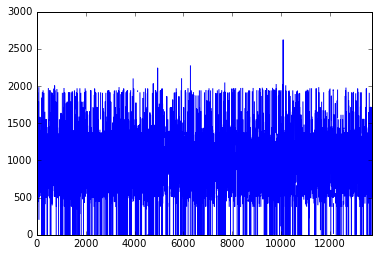

In [36]:
#plotting international support to see range of values
disaster_df['International support'].plot()

Most of the values are near the area of 1000. Let us find the average to prove that.

In [37]:
#finding average with sum and count
disaster_df['International support'].sum()/disaster_df['International support'].count()

1014.796599883008

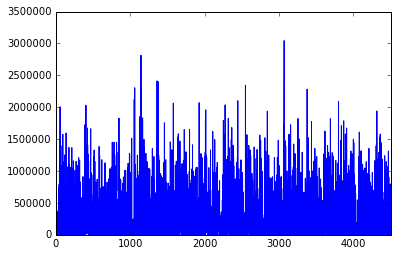

In [38]:
#plotting international support values in recent data
disaster_recentdf['International support'].plot()

There is maximum density in the region of 250000. Let us find the average.

In [39]:
#finding average with sum and count
disaster_recentdf['International support'].sum()/disaster_recentdf['International support'].count()

327835.50916055957

From the above statistics, range in the recent disaster set is quite high compared to the range in old disaster set. Since, there is no information regarding the unit of the values in that column from the source, we can suspect some conversion in the units leading to difference in ranges. This problem can only be rectified if the source or unit of those values are made available.

In [40]:
disaster_df.columns

Index([u'Start', u'End', u'Country', u'Location', u'Type', u'Sub_Type',
       u'Names', u'Killed', u'Affected', u'International support',
       u'Country iso', u'continent'],
      dtype='object')

### Merging two dataframes using 'outer'

In [41]:
ds_merge = pd.merge(disaster_df,disaster_recentdf,how='outer')
ds_merge

,Start,End,Country,Location,Type,Sub_Type,Names,Killed,Affected,International support,Country iso,continent,year,disaster group,disaster subgroup,occurrence,Affected1,Injured,Homeless,Total damage
0,1965-06-01,1965-06-01,Japan,NaN,storm,tropical cyclone,Dinah,61.0,30000.0,1934.944,JPN,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-09-01,2004-09-01,Grenada,NaN,storm,tropical cyclone,Ivan,39.0,60000.0,1090.830,GRD,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1995-03-01,1995-03-01,Russian Federation (the),Kalmoukie:Daghestan (Mer ...,transport accident,water,NaN,52.0,NaN,NaN,RUS,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1983-02-01,1983-02-01,Cuba,Santiago de Cuba:Pinar d ...,flood,NaN,NaN,15.0,164575.0,905.275,CUB,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1996-07-01,1996-07-01,Russian Federation (the),Volgorgrad,industrial accident,gas leak,Oil refinery,NaN,NaN,NaN,RUS,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2003-06-01,2003-06-01,Turkey,Kayseri,miscellaneous accident,explosion,Dormitory of a school,10.0,13.0,824.806,TUR,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2003-02-01,2003-02-01,Pakistan,Baluchistan:Sindh:North ...,storm,NaN,NaN,51.0,2557.0,992.690,PAK,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1986-08-01,1986-08-01,Honduras,Northeast Honduras/Mosqui ...,flood,NaN,NaN,NaN,30000.0,NaN,HND,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2007-10-01,2007-10-01,Colombia,Near Suarez (Cauca),industrial accident,collapse,Cold mine,22.0,24.0,888.882,COL,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2002-09-01,2002-09-01,Senegal,Au large de la Gambie,transport accident,water,Ferry 'Joola',1200.0,NaN,NaN,SEN,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conflicts rised during merge:
> - There are totally 20 columns combining both dataframes.
- All the unmapped columns contains lot of missing values.

Let us resolve conflict in each column one by one.

### Resolving subgroup column conflict
Subgroup and Group for disasters are null for the first 13000 rows as they are present only in the recent disaster set. It would be a better option to drop the two columns since most of the data is missing. But the data can be rolled up further during analysis if group and subgroup for a disaster is present.

Let us have a look at the available type column.

In [42]:
#making the datatype of type column as category
ds_merge['Type'] = ds_merge['Type'].astype('category')
#finding the count for each category
types= pd.value_counts(ds_merge['Type'].values, sort=True)
types

transport accident               3525
flood                            2736
storm                            2593
Flood                            1609
Storm                             970
epidemic                          899
miscellaneous accident            897
industrial accident               878
earthquake (seismic activity)     874
Epidemic                          595
mass movement wet                 409
Extreme temperature               328
extreme temperature               291
Earthquake                        268
Drought                           266
wildfire                          266
Landslide                         219
volcano                           157
Wildfire                          144
drought                            78
Volcanic activity                  71
insect infestation                 46
mass movement dry                  43
Insect infestation                 19
Mass movement (dry)                12
complex disasters                   2
Impact      

Lot of inconsistencies in naming of types such as 'Extreme Temperature' and 'extreme temperature' resulting in duplications.

In [43]:
# Making all the initial letter of types upppercase
typeconversion = lambda x: x.title()
ds_merge['Type'] = ds_merge.Type.apply(typeconversion)

In [44]:
types= pd.value_counts(ds_merge['Type'].values, sort=True)
types

Flood                            4345
Storm                            3563
Transport Accident               3525
Epidemic                         1494
Miscellaneous Accident            897
Industrial Accident               878
Earthquake (Seismic Activity)     874
Wildfire                          410
Mass Movement Wet                 409
Drought                           344
Extreme Temperature               328
Extreme Temperature               291
Earthquake                        268
Landslide                         219
Volcano                           157
Volcanic Activity                  71
Insect Infestation                 65
Mass Movement Dry                  43
Mass Movement (Dry)                12
Complex Disasters                   2
Animal Accident                     1
Impact                              1
dtype: int64

Now most of the inconsistencies have been removed. Using the available data, we try to find the respective subgroup by using group by on type column.

In [45]:
ds_merge['Type'].values

array(['Storm', 'Storm', 'Transport Accident', ..., 'Wildfire', 'Wildfire',
       'Wildfire'], dtype=object)

In [46]:
gb = ds_merge.groupby('Type')
gb['disaster subgroup'].unique()

Type
Animal Accident                           [Biological]
Complex Disasters                                [nan]
Drought                          [nan, Climatological]
Earthquake                               [Geophysical]
Earthquake (Seismic Activity)                    [nan]
Epidemic                             [nan, Biological]
Extreme Temperature                              [nan]
Extreme Temperature                   [Meteorological]
Flood                              [nan, Hydrological]
Impact                             [Extra-terrestrial]
Industrial Accident                              [nan]
Insect Infestation                   [nan, Biological]
Landslide                               [Hydrological]
Mass Movement (Dry)                      [Geophysical]
Mass Movement Dry                                [nan]
Mass Movement Wet                                [nan]
Miscellaneous Accident                           [nan]
Storm                            [nan, Meteorological]
Trans

As a result, we get a set of subgroups respective to the type column. But still there are no subgroups for many types.
The missing subgroups can be found from the [classification](http://www.emdat.be/classification) document available in EM-DAT source.

<table style="undefined;table-layout: fixed; width: 726px">
<colgroup>
<col style="width: 193px">
<col style="width: 231px">
<col style="width: 302px">
</colgroup>
  <tr>
    <th>Type</th>
    <th>Subgroup</th>
    <th>Group</th>
  </tr>
  <tr>
    <td>Animal Accident</td>
    <td>Biological </td>
    <td>Natural</td>
  </tr>
  <tr>
    <td>Drought</td>
    <td>Climatological</td>
    <td>Natural</td>
  </tr>
  <tr>
    <td>Earthquake </td>
    <td>Geophysical</td>
    <td>Natural</td>
  </tr>
  <tr>
    <td>Epidemic</td>
    <td>Biological </td>
    <td>Natural</td>
  </tr>
  <tr>
    <td>Extreme Temperature</td>
    <td>Meteorological</td>
    <td>Natural</td>
  </tr>
  <tr>
    <td>Flood</td>
    <td>Hydrological</td>
    <td>Natural</td>
  </tr>
  <tr>
    <td>Impact</td>
    <td>Extraterrestrial</td>
    <td>Natural</td>
  </tr>
  <tr>
    <td>Industrial Accident</td>
    <td></td>
    <td>Technological</td>
  </tr>
  <tr>
    <td>Insect Infestation</td>
    <td>Biological </td>
    <td>Natural</td>
  </tr>
  <tr>
    <td>Landslide</td>
    <td>Hydrological</td>
    <td>Natural</td>
  </tr>
  <tr>
    <td>Mass Movement</td>
    <td>Geophysical</td>
    <td>Natural</td>
  </tr>
  <tr>
    <td>Miscellaneous Accident</td>
    <td></td>
    <td>Technological</td>
  </tr>
  <tr>
    <td>Storm</td>
    <td>Meteorological</td>
    <td></td>
  </tr>
  <tr>
    <td>Transport Accident</td>
    <td></td>
    <td>Technological</td>
  </tr>
  <tr>
    <td>Volcanic Activity</td>
    <td>Geophysical</td>
    <td>Natural</td>
  </tr>
  <tr>
    <td>Wildfire</td>
    <td>Climatological</td>
    <td>Natural</td>
  </tr>
  <tr>
    <td>Complex Disasters</td>
    <td></td>
    <td>Complex</td>
  </tr>
</table>

In [47]:
ds_merge[ds_merge.Type=='Complex Disasters']

,Start,End,Country,Location,Type,Sub_Type,Names,Killed,Affected,International support,Country iso,continent,year,disaster group,disaster subgroup,occurrence,Affected1,Injured,Homeless,Total damage
4624,2005-08-01,2005-08-01,Nicaragua,Northern,Complex Disasters,NaN,NaN,NaN,12500.0,NaN,NIC,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7779,2007-02-01,2007-02-01,Burundi,Kayanza province:central ...,Complex Disasters,famine,NaN,NaN,2000000.0,NaN,BDI,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Subgroup column imputation

Based on the table given above, respective subgroups are assigned to their types.

In [48]:
ds_merge.loc[ds_merge['Type'].isin(['Animal Accident','Epidemic','Insect Infestation']),'disaster subgroup']='Biological'

In [49]:
ds_merge.loc[ds_merge['Type'].isin(['Flood','Landslide']),'disaster subgroup']='Hydrological'

In [50]:
ds_merge.loc[ds_merge['Type'].isin(['Drought','Wildfire']),'disaster subgroup']='Climatological'

In [51]:
ds_merge.loc[ds_merge['Type'].isin(['Volcanic Activity','Volcano','Earthquake','Earthquake (Seismic Activity)','Mass Movement (Dry)','Mass Movement Dry','Mass Movement Wet']),'disaster subgroup']='Geophysical'

In [52]:
ds_merge.loc[ds_merge['Type'].isin(['Extreme Temperature','Storm']),'disaster subgroup']='Meteorological'

In [53]:
ds_merge.loc[ds_merge['Type']=='Impact','disaster subgroup']='Extraterrestrial'

In the source classification, industrial accident, transport accident and miscellaneous accident are actually subgroups and the types are defined for each subgroups. But in our data, types have been moved to the subtypes, leaving the subgroups empty. Instead of altering the original cleaned dataset, both types and subgroups will be same for these particular types.

In [54]:
ds_merge.loc[ds_merge['Type']=='Industrial Accident','disaster subgroup']='Industrial Accident'

In [55]:
ds_merge.loc[ds_merge['Type']=='Miscellaneous Accident','disaster subgroup']='Miscellaneous Accident'

In [56]:
ds_merge.loc[ds_merge['Type']=='Transport Accident','disaster subgroup']='Transport Accident'

In [57]:
ds_merge[ds_merge.Type=='Complex Disasters']

,Start,End,Country,Location,Type,Sub_Type,Names,Killed,Affected,International support,Country iso,continent,year,disaster group,disaster subgroup,occurrence,Affected1,Injured,Homeless,Total damage
4624,2005-08-01,2005-08-01,Nicaragua,Northern,Complex Disasters,NaN,NaN,NaN,12500.0,NaN,NIC,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7779,2007-02-01,2007-02-01,Burundi,Kayanza province:central ...,Complex Disasters,famine,NaN,NaN,2000000.0,NaN,BDI,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is no type as 'Complex Disasters' in the classification. Hence, we make both subgroup and group as 'Complex Disasters' since there are only two rows for that type.

In [58]:
ds_merge.loc[ds_merge['Type']=='Complex Disasters','disaster subgroup']='Complex Disasters'

In [59]:
#Checking if there are any null values
ds_merge[ds_merge['disaster subgroup'].isnull()]

,Start,End,Country,Location,Type,Sub_Type,Names,Killed,Affected,International support,Country iso,continent,year,disaster group,disaster subgroup,occurrence,Affected1,Injured,Homeless,Total damage


In [60]:
gb = ds_merge.groupby('Type')
gb['disaster subgroup'].unique()

Type
Animal Accident                              [Biological]
Complex Disasters                     [Complex Disasters]
Drought                                  [Climatological]
Earthquake                                  [Geophysical]
Earthquake (Seismic Activity)               [Geophysical]
Epidemic                                     [Biological]
Extreme Temperature                      [Meteorological]
Extreme Temperature                      [Meteorological]
Flood                                      [Hydrological]
Impact                                 [Extraterrestrial]
Industrial Accident                 [Industrial Accident]
Insect Infestation                           [Biological]
Landslide                                  [Hydrological]
Mass Movement (Dry)                         [Geophysical]
Mass Movement Dry                           [Geophysical]
Mass Movement Wet                           [Geophysical]
Miscellaneous Accident           [Miscellaneous Accident]
Storm    

Hence,Type column has been imputed perfectly.

### Group Column Imputation
Similarly, based on the classification table, group values are assigned to the entire dataset.

In [61]:
ds_merge.loc[ds_merge['disaster subgroup']=='Complex Disasters','disaster group']='Complex'

In [62]:
ds_merge.loc[ds_merge['disaster subgroup']\
             .isin(['Biological','Climatological','Geophysical','Meteorological','Hydrological','Extraterrestrial']),\
             'disaster group']='Natural'

In [63]:
ds_merge.loc[ds_merge['disaster subgroup']\
             .isin(['Industrial Accident','Miscellaneous Accident','Transport Accident']),\
             'disaster group']='Technological'

In [64]:
#Checking groups assigned to the subgroups
gb = ds_merge.groupby('Type')
gb['disaster group'].unique()

Type
Animal Accident                        [Natural]
Complex Disasters                      [Complex]
Drought                                [Natural]
Earthquake                             [Natural]
Earthquake (Seismic Activity)          [Natural]
Epidemic                               [Natural]
Extreme Temperature                    [Natural]
Extreme Temperature                    [Natural]
Flood                                  [Natural]
Impact                                 [Natural]
Industrial Accident              [Technological]
Insect Infestation                     [Natural]
Landslide                              [Natural]
Mass Movement (Dry)                    [Natural]
Mass Movement Dry                      [Natural]
Mass Movement Wet                      [Natural]
Miscellaneous Accident           [Technological]
Storm                                  [Natural]
Transport Accident               [Technological]
Volcanic Activity                      [Natural]
Volcano        

In [65]:
ds_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18197 entries, 0 to 18196
Data columns (total 20 columns):
Start                    18197 non-null object
End                      18197 non-null object
Country                  18197 non-null object
Location                 16523 non-null object
Type                     18197 non-null object
Sub_Type                 16417 non-null object
Names                    4444 non-null object
Killed                   15601 non-null float64
Affected                 13020 non-null float64
International support    11341 non-null float64
Country iso              18197 non-null object
continent                18197 non-null object
year                     4503 non-null float64
disaster group           18197 non-null object
disaster subgroup        18197 non-null object
occurrence               4503 non-null float64
Affected1                4503 non-null float64
Injured                  4503 non-null float64
Homeless                 4503 non-null floa

Hence, group and subgroup columns do not have any null values after imputation.

### Fixing year column
From the start dates in the dataset, year can be extracted and imputed into the empty year values in the dataset

In [66]:
#Function to extract year from the dates
def extractyear(date):
    return date[: -6].zfill(2)

#Applying extractyear function to null year values in the dataset.
year_df=ds_merge[ds_merge.year.isnull()].Start.apply(extractyear)
#Copying the dataset to year column in the dataset
ds_merge.loc[ds_merge.year.isnull(),'year']=year_df

In [67]:
#Converting to datetime format
ds_merge['Start'] = pd.to_datetime(ds_merge['Start'], format="%Y-%m-%d")       
ds_merge['End'] = pd.to_datetime(ds_merge['End'], format="%Y-%m-%d")

In [68]:
#converting the year from float to int as it was in the recent dataset
ds_merge['year']=ds_merge.year.astype('int64')
#applying category datatype to all the category columns
ds_merge['Type'] = ds_merge['Type'].astype('category')
ds_merge['Sub_Type'] = ds_merge['Sub_Type'].astype('category')
ds_merge['disaster group'] = ds_merge['disaster group'].astype('category')
ds_merge['disaster subgroup'] = ds_merge['disaster subgroup'].astype('category')

In [69]:
ds_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18197 entries, 0 to 18196
Data columns (total 20 columns):
Start                    18197 non-null datetime64[ns]
End                      18197 non-null datetime64[ns]
Country                  18197 non-null object
Location                 16523 non-null object
Type                     18197 non-null category
Sub_Type                 16417 non-null category
Names                    4444 non-null object
Killed                   15601 non-null float64
Affected                 13020 non-null float64
International support    11341 non-null float64
Country iso              18197 non-null object
continent                18197 non-null object
year                     18197 non-null int64
disaster group           18197 non-null category
disaster subgroup        18197 non-null category
occurrence               4503 non-null float64
Affected1                4503 non-null float64
Injured                  4503 non-null float64
Homeless            

### Resolving conflicts with Affected Column
From the EM-DAT source, it is evident that the columns Affected, Injured and Homeless are the subset of Total Affected columns. All the three columns values are added to give total affected column.
But those three columns have only 4503 values as you can see from the dataframe information. Imputing those columns with a value like 0, will affect the analysis. Having them will also affect the analysis since there are lot of missing values. Therefore, we decide to drop those three columns as the clubbed information is available on Affected column. Similarly, total damage column is found only in recent dataset. There is no way to determine the damages cost of the disaster with only 4000 rows of data. Hence, we are not including them in the global schema.

In [70]:
ds_merge.drop(['Affected1','Injured','Homeless','Total damage'], axis=1, inplace=True)

### Conflicts with Occurence column
There is no occurence column in disaster_df resulting in 13000 missing rows of occurence values. We try to find how occurence can be derived by doing 'group by' on a set of columns.

In [71]:
ds_merge[ds_merge['occurrence'].isnull()].groupby(by=['year','Country iso','Country', 'continent' ,'Type','Sub_Type']).size().reset_index(name='occurrence')

,year,Country iso,Country,continent,Type,Sub_Type,occurrence
0,1900,JAM,Jamaica,Americas,Epidemic,viral infectious diseases,1
1,1900,JPN,Japan,Asia,Volcano,volcanic eruption,1
2,1900,USA,United States of America (the),Americas,Miscellaneous Accident,fire,1
3,1900,USA,United States of America (the),Americas,Storm,tropical cyclone,1
4,1901,BEL,Belgium,Europe,Industrial Accident,explosion,1
5,1901,TZA,"Tanzania, United Republic of",Africa,Earthquake (Seismic Activity),earthquake (ground shaking),1
6,1902,GTM,Guatemala,Americas,Earthquake (Seismic Activity),earthquake (ground shaking),1
7,1902,GTM,Guatemala,Americas,Volcano,volcanic eruption,2
8,1902,JPN,Japan,Asia,Volcano,volcanic eruption,1
9,1902,MMR,Myanmar,Asia,Storm,tropical cyclone,1


This gives only 8440 rows and remaining rows will still be empty. However, we are not sure of how this column is derived. Even the source did not have explanatory notes about this column. So we decide to drop it.

In [72]:
ds_merge.drop('occurrence', axis=1, inplace=True)

In [73]:
ds_merge

,Start,End,Country,Location,Type,Sub_Type,Names,Killed,Affected,International support,Country iso,continent,year,disaster group,disaster subgroup
0,1965-06-01,1965-06-01,Japan,NaN,Storm,tropical cyclone,Dinah,61.0,30000.0,1934.944,JPN,Asia,1965,Natural,Meteorological
1,2004-09-01,2004-09-01,Grenada,NaN,Storm,tropical cyclone,Ivan,39.0,60000.0,1090.830,GRD,Americas,2004,Natural,Meteorological
2,1995-03-01,1995-03-01,Russian Federation (the),Kalmoukie:Daghestan (Mer ...,Transport Accident,water,NaN,52.0,NaN,NaN,RUS,Europe,1995,Technological,Transport Accident
3,1983-02-01,1983-02-01,Cuba,Santiago de Cuba:Pinar d ...,Flood,NaN,NaN,15.0,164575.0,905.275,CUB,Americas,1983,Natural,Hydrological
4,1996-07-01,1996-07-01,Russian Federation (the),Volgorgrad,Industrial Accident,gas leak,Oil refinery,NaN,NaN,NaN,RUS,Europe,1996,Technological,Industrial Accident
5,2003-06-01,2003-06-01,Turkey,Kayseri,Miscellaneous Accident,explosion,Dormitory of a school,10.0,13.0,824.806,TUR,Asia,2003,Technological,Miscellaneous Accident
6,2003-02-01,2003-02-01,Pakistan,Baluchistan:Sindh:North ...,Storm,NaN,NaN,51.0,2557.0,992.690,PAK,Asia,2003,Natural,Meteorological
7,1986-08-01,1986-08-01,Honduras,Northeast Honduras/Mosqui ...,Flood,NaN,NaN,NaN,30000.0,NaN,HND,Americas,1986,Natural,Hydrological
8,2007-10-01,2007-10-01,Colombia,Near Suarez (Cauca),Industrial Accident,collapse,Cold mine,22.0,24.0,888.882,COL,Americas,2007,Technological,Industrial Accident
9,2002-09-01,2002-09-01,Senegal,Au large de la Gambie,Transport Accident,water,Ferry 'Joola',1200.0,NaN,NaN,SEN,Africa,2002,Technological,Transport Accident


### Creating global key

In [74]:
#creating a new Primary key value starting from 10000
ds_merge.insert(0, 'ID', range(10000, 10000 + len(ds_merge)))


Inorder for the primary key to be semantically related with the data, we join iso name of the country and year of the disaster.

In [75]:
#combining iso and year columns to ID
ds_merge['ID']=ds_merge.ID.map(str) + ds_merge['year'].map(str) + ds_merge['Country iso']

In [76]:
ds_merge

,ID,Start,End,Country,Location,Type,Sub_Type,Names,Killed,Affected,International support,Country iso,continent,year,disaster group,disaster subgroup
0,100001965JPN,1965-06-01,1965-06-01,Japan,NaN,Storm,tropical cyclone,Dinah,61.0,30000.0,1934.944,JPN,Asia,1965,Natural,Meteorological
1,100012004GRD,2004-09-01,2004-09-01,Grenada,NaN,Storm,tropical cyclone,Ivan,39.0,60000.0,1090.830,GRD,Americas,2004,Natural,Meteorological
2,100021995RUS,1995-03-01,1995-03-01,Russian Federation (the),Kalmoukie:Daghestan (Mer ...,Transport Accident,water,NaN,52.0,NaN,NaN,RUS,Europe,1995,Technological,Transport Accident
3,100031983CUB,1983-02-01,1983-02-01,Cuba,Santiago de Cuba:Pinar d ...,Flood,NaN,NaN,15.0,164575.0,905.275,CUB,Americas,1983,Natural,Hydrological
4,100041996RUS,1996-07-01,1996-07-01,Russian Federation (the),Volgorgrad,Industrial Accident,gas leak,Oil refinery,NaN,NaN,NaN,RUS,Europe,1996,Technological,Industrial Accident
5,100052003TUR,2003-06-01,2003-06-01,Turkey,Kayseri,Miscellaneous Accident,explosion,Dormitory of a school,10.0,13.0,824.806,TUR,Asia,2003,Technological,Miscellaneous Accident
6,100062003PAK,2003-02-01,2003-02-01,Pakistan,Baluchistan:Sindh:North ...,Storm,NaN,NaN,51.0,2557.0,992.690,PAK,Asia,2003,Natural,Meteorological
7,100071986HND,1986-08-01,1986-08-01,Honduras,Northeast Honduras/Mosqui ...,Flood,NaN,NaN,NaN,30000.0,NaN,HND,Americas,1986,Natural,Hydrological
8,100082007COL,2007-10-01,2007-10-01,Colombia,Near Suarez (Cauca),Industrial Accident,collapse,Cold mine,22.0,24.0,888.882,COL,Americas,2007,Technological,Industrial Accident
9,100092002SEN,2002-09-01,2002-09-01,Senegal,Au large de la Gambie,Transport Accident,water,Ferry 'Joola',1200.0,NaN,NaN,SEN,Africa,2002,Technological,Transport Accident


Hence, the integrated data with a global key 'ID' is ready to be transferred to an output file.
The final global schema is:
**(ID, Start, End, Country, Location, Type, Sub_type, Names, Killed, Affected,International Support, Country iso, continent, year, disaster group, disaster subgroup)**

### Writing the integrated data to a CSV file

In [77]:
ds_merge.to_csv("data_integrated.csv",sep=',')

## Mash Up Map

Finding the number of disasters between 1980-2015 and plotting them on a map

In [78]:
#Selecting rows having year between 1980 and 2015
ds_mergebyyear=ds_merge.query('1980 < year < 2015')

In [79]:
#grouping by country and getting the count of disasters for each country
counts_df = pd.DataFrame(ds_mergebyyear.groupby('Country iso').size().rename('counts'))

#converting them to a dictionary for mash map
countvalues = dict(counts_df['counts'])
countvalues

{'AFG': 178,
 'AGO': 93,
 'AIA': 3,
 'ALB': 32,
 'ARE': 8,
 'ARG': 111,
 'ARM': 12,
 'ASM': 7,
 'ATG': 8,
 'AUS': 189,
 'AUT': 57,
 'AZE': 24,
 'AZO': 6,
 'BDI': 66,
 'BEL': 63,
 'BEN': 51,
 'BFA': 55,
 'BGD': 373,
 'BGR': 54,
 'BHR': 1,
 'BHS': 21,
 'BIH': 26,
 'BLR': 16,
 'BLZ': 19,
 'BMU': 7,
 'BOL': 100,
 'BRA': 229,
 'BRB': 11,
 'BTN': 11,
 'BWA': 15,
 'CAF': 51,
 'CAN': 128,
 'CHE': 66,
 'CHL': 94,
 'CHN': 1152,
 'CIV': 39,
 'CMR': 68,
 'COD': 76,
 'COG': 159,
 'COK': 11,
 'COL': 166,
 'COM': 30,
 'CPV': 8,
 'CRI': 59,
 'CUB': 77,
 'CYM': 11,
 'CYP': 17,
 'CZE': 43,
 'DEU': 120,
 'DJI': 20,
 'DMA': 11,
 'DNK': 17,
 'DOM': 71,
 'DZA': 109,
 'ECU': 86,
 'EGY': 143,
 'ERI': 9,
 'ESP': 117,
 'EST': 6,
 'ETH': 120,
 'FIN': 5,
 'FJI': 40,
 'FRA': 178,
 'FSM': 12,
 'GAB': 19,
 'GBR': 123,
 'GEO': 32,
 'GHA': 51,
 'GIN': 61,
 'GLP': 10,
 'GMB': 32,
 'GNB': 29,
 'GNQ': 14,
 'GRC': 97,
 'GRD': 7,
 'GTM': 111,
 'GUF': 2,
 'GUM': 9,
 'GUY': 10,
 'HKG': 53,
 'HND': 75,
 'HRV': 36,
 'HTI': 116

The above associated array shows the list of all ISO country names with number of disasters. Let us convert this dictionary to a dataframe to further analyse and decide on the range for plotting.

In [80]:
#Dataframe of countries to be plotted on the map
plotCountries = pd.DataFrame(countvalues.items(),columns=['Countries', 'Number of Disasters'])
print 'Total:'
print plotCountries.Countries.count()
print 'Minimum:'
print plotCountries['Number of Disasters'].min()
print 'Maximum:'
print plotCountries['Number of Disasters'].max()
print 'Number of disasters less than or equal to 10'
print plotCountries.Countries[plotCountries['Number of Disasters']<=10].count()
print 'Number of disasters between 10 and 50'
print plotCountries.Countries[(plotCountries['Number of Disasters']>10) & (plotCountries['Number of Disasters']<=50)].count()
print 'Number of disasters greater than 50'
print plotCountries.Countries[plotCountries['Number of Disasters']>50].count()

Total:
217
Minimum:
1
Maximum:
1152
Number of disasters less than or equal to 10
52
Number of disasters between 10 and 50
78
Number of disasters greater than 50
87


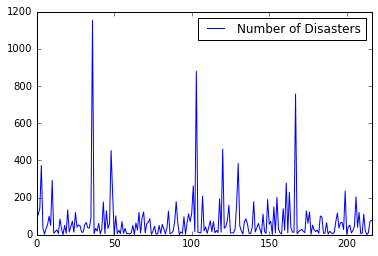

In [81]:
#Plotting the disasters to see how the data is spread
plotCountries.plot()

Most of the data is below the range of 100 followed by very high peaks upto 1500. Hence based on the number of records from the queries above, we decide on three ranges.
> - Less than or equal to 10
- Between 10 and 50
- Greater than 50

### Importing and loading base map

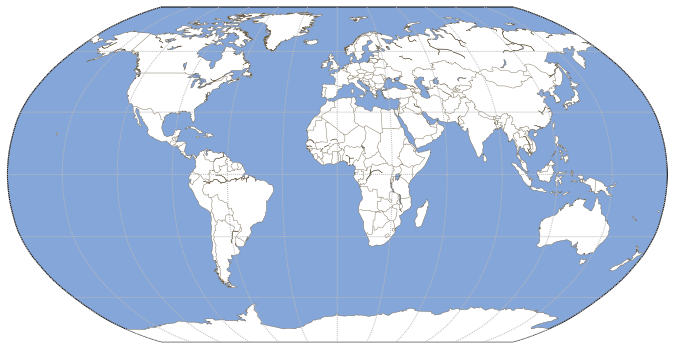

In [82]:
#size of the figure
plt.figure(figsize = (12,6)) 
#import a basemap
m = Basemap(projection = 'robin', lon_0 = 0, resolution = 'c') 
#set a background colour 
m.drawmapboundary(fill_color = '#85A6D9')
#setting values to all the boundaries
m.fillcontinents(color = 'white', lake_color = '#85A6D9') 
m.drawcoastlines(color = '#6D5F47', linewidth = .4) 
m.drawcountries(color = '#6D5F47', linewidth = .4)
#drawing meridians and parallels for the map
m.drawmeridians(np.arange(-180, 180, 30), color = '#bbbbbb') 
m.drawparallels(np.arange(-90, 90, 30), color = '#bbbbbb')

plt.show()

In [83]:
#Comparing countries in shapefile and our dictionary of countries and printing the mismatches
shp_info = m.readshapefile('world_countries_boundary_file_world_2002','countries',drawbounds=False)
#empty array to store all ISo names in shape file
countryisos=[]
#iterating through countries in shape file
for shapedict in m.countries_info:
    isoname = shapedict['ISO_3_CODE']
    #when the isoname from shape file is not in the plotting list, add the isoname to the list with 0 disasters
    if isoname not in countvalues:
        countvalues[isoname]=0
        print isoname
    #appending the isoname to the empty array    
    countryisos.append(isoname)

AND
AQ
BRN
FLK
FRO
GRL
                                                                                
IMY
SJM
LIE
MCO
QAT
SMR
ESH


In [84]:
#antarctica has a 2 letter ISO_3_code
m.countries_info[6]

{'AREA': 0,
 'GMI_CNTRY': 'ATA',
 'ISO_2_CODE': 'ATA',
 'ISO_3_CODE': 'AQ',
 'NAME': 'Antarctica',
 'NAME_1': 'Antarctica',
 'NAME_12': 'Antarctica',
 'POP2005': 0,
 'REGION': 'Antarctica',
 'RINGNUM': 1,
 'SHAPENUM': 6}

In [85]:
#finding mistakes in shapefiles
for shapedict in m.countries_info:
    #printing all the iso codes with their countries
    print shapedict['ISO_3_CODE']+shapedict['NAME']
    

AFGAfghanistan
ALBAlbania
DZAAlgeria
ANDAndorra
AGOAngola
AGOAngola
AQAntarctica
AQAntarctica
AQAntarctica
AQAntarctica
AQAntarctica
AQAntarctica
AQAntarctica
AQAntarctica
AQAntarctica
AQAntarctica
AQAntarctica
AQAntarctica
AQAntarctica
AQAntarctica
AQAntarctica
AQAntarctica
AQAntarctica
ATGAntigua and Barbuda
ATGAntigua and Barbuda
ARGArgentina
ARGArgentina
ARGArgentina
ARMArmenia
AUSAustralia
AUSAustralia
AUSAustralia
AUSAustralia
AUSAustralia
AUSAustralia
AUSAustralia
AUSAustralia
AUSAustralia
AUSAustralia
AUSAustralia
AUSAustralia
AUSAustralia
AUSAustralia
AUTAustria
AZEAzerbaijan
AZEAzerbaijan
BHSBahamas, The
BHSBahamas, The
BHSBahamas, The
BHSBahamas, The
BHSBahamas, The
BHSBahamas, The
BHSBahamas, The
BHSBahamas, The
BHRBahrain
BGDBangladesh
BGDBangladesh
BRBBarbados
BELBelgium
BLZBelize
BENBenin
BMUBermuda
BTNBhutan
BOLBolivia
BIHBosnia and Herzegovina
BWABotswana
BRABrazil
BRABrazil
BRABrazil
BRABrazil
BRABrazil
BRABrazil
BRABrazil
BRABrazil
BRABrazil
BRABrazil
BRABrazil
BRNBr

There are some missing ISO 3 codes for some countries in the shape file. Fixing those ISO codes is out of scope of this task. But, this is the reason of empty first key in the colors dictionary.

Countries which are not in disasters set are:
>- SJM-Svalbard and Jan Mayen
- SMR-San Marino
- QAT-Qatar
- MCO-monaco
- LIE-leichtenstein
- GRL-greenland
- FRO-faroe islands
- FLK-falkland islands(Malvinas)
- ESH-western sahara
- BRN-brunei darussalam
- AQ-antarctica
- AND-andorra

Source: [https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3)

All the above countries' disaster count is set to zero in the above function.

Now, all the countries in the shape file has a value and is ready to be plotted. Next step is to set the color for each range of values decided.

In [86]:
colors={}
#iterating through each country in shape file and setting the corresponding color
for s in countryisos:
    if countvalues[s]<=10:
        colors[s] = 'orange'
    elif countvalues[s]>10 and countvalues[s]<=50:
        colors[s] = 'yellow'
    else:
        colors[s] = 'red'
colors

{'                                                                                ': 'orange',
 'AFG': 'red',
 'AGO': 'red',
 'ALB': 'yellow',
 'AND': 'orange',
 'AQ': 'orange',
 'ARE': 'orange',
 'ARG': 'red',
 'ARM': 'yellow',
 'ATG': 'orange',
 'AUS': 'red',
 'AUT': 'red',
 'AZE': 'yellow',
 'BDI': 'red',
 'BEL': 'red',
 'BEN': 'red',
 'BFA': 'red',
 'BGD': 'red',
 'BGR': 'red',
 'BHR': 'orange',
 'BHS': 'yellow',
 'BIH': 'yellow',
 'BLR': 'yellow',
 'BLZ': 'yellow',
 'BMU': 'orange',
 'BOL': 'red',
 'BRA': 'red',
 'BRB': 'yellow',
 'BRN': 'orange',
 'BTN': 'yellow',
 'BWA': 'yellow',
 'CAF': 'red',
 'CAN': 'red',
 'CHE': 'red',
 'CHL': 'red',
 'CHN': 'red',
 'CIV': 'yellow',
 'CMR': 'red',
 'COD': 'red',
 'COG': 'red',
 'COL': 'red',
 'COM': 'yellow',
 'CPV': 'orange',
 'CRI': 'red',
 'CUB': 'red',
 'CYP': 'yellow',
 'CZE': 'yellow',
 'DEU': 'red',
 'DJI': 'yellow',
 'DMA': 'yellow',
 'DNK': 'yellow',
 'DOM': 'red',
 'DZA': 'red',
 'ECU': 'red',
 'EGY': 'red',
 'ERI': 'orange',
 'E

Hence, colors are assigned for each iso name.

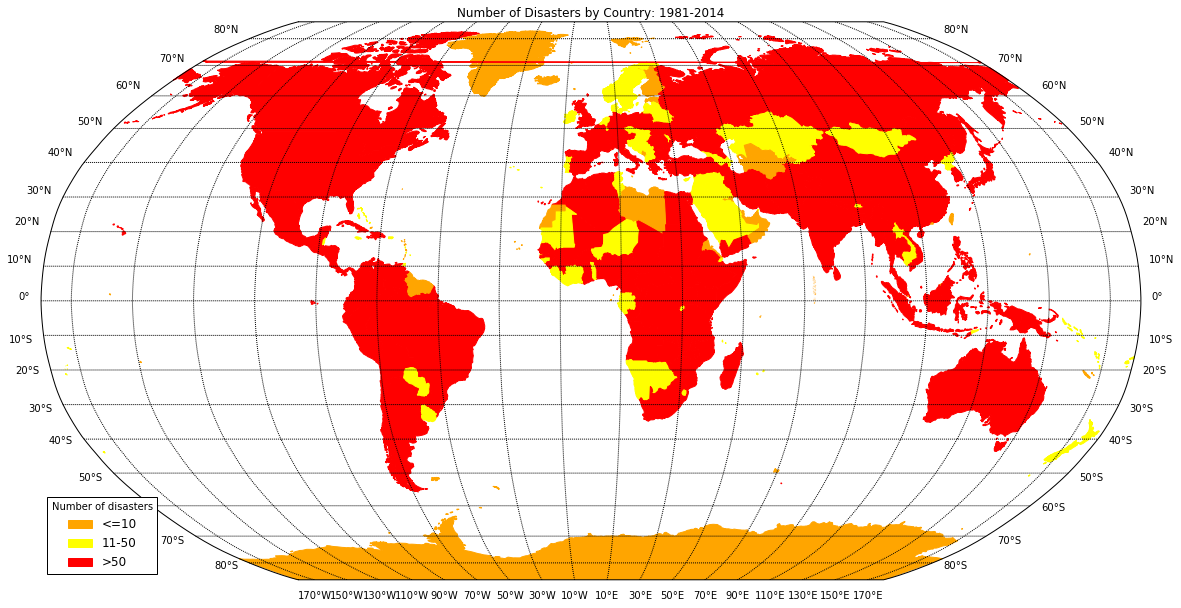

In [87]:
import matplotlib.patches as mpatches
#setting the size
plt.figure(figsize=(20,10))
#iterating through each country in shape file and filling them with color assigned using the colors array
for nshape,seg in enumerate(m.countries):
    #getting x,y co-ordinates
    xx,yy = zip(*seg)
    #getting the corresponding color
    color = colors[countryisos[nshape]]
    #plotting them on the map
    plt.fill(xx,yy,color,edgecolor=color)
#setting the parallels with 10 degree interval from -90 to 90 degrees  
parallels = np.arange(-80.,81,10.)
m.drawparallels(parallels,labels=[True,True,True,True])
#setting the meridians with 20 degree interval from -180 to 180 degrees
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
#setting the legend for the plot using patch
lt = mpatches.Patch(color='orange', label='<=10')
btwn = mpatches.Patch(color='yellow', label='11-50')
gt = mpatches.Patch(color='red', label='>50')
plt.legend(handles=[lt,btwn,gt],title='Number of disasters', loc=3)
#setting the title for the plot
plt.title('Number of Disasters by Country: 1981-2014')

From the above graph, more than 50 disasters have occurred all throughout the World from 1981 to 2014. Only some parts of the World such as Antarctica, Greenland, Gulf Countries and Northern part of Africa has less than 10 disasters.
The above graph has only three ranges. To get more insights on the spread of disasters, we can adopt sequential plotting in matplotlib.

In [88]:
colors={}
#range is made very small to observe more spread in data while plotting
vmin = 0; vmax = 1 
#importing a sequential colorset
cmap = plt.cm.BrBG
#Applying min max normalisation over the entire data
for s in countryisos:
    colors[s] = cmap((countvalues[s]-vmin)/(vmax-vmin))[:3]
#display assigned colors
colors

{'                                                                                ': (0.32941177487373352,
  0.18823529779911041,
  0.019607843831181526),
 'AFG': (0.50742025235119992, 0.80615149175419532, 0.75963092551511879),
 'AGO': (0.93287197631948138, 0.85720877437030563, 0.66782007848515235),
 'ALB': (0.60000002384185791, 0.36562861998875934, 0.07420223206281662),
 'AND': (0.32941177487373352, 0.18823529779911041, 0.019607843831181526),
 'AQ': (0.32941177487373352, 0.18823529779911041, 0.019607843831181526),
 'ARE': (0.39830835835606443, 0.2288350693735422, 0.025759324248807104),
 'ARG': (0.96332180149414959, 0.92779700545703658, 0.8339100445018095),
 'ARM': (0.43275665009722991, 0.24913495516075806, 0.028835064457619894),
 'ATG': (0.39830835835606443, 0.2288350693735422, 0.025759324248807104),
 'AUS': (0.3808535363744287, 0.71672435367808629, 0.6761245867785286),
 'AUT': (0.77854672600241259, 0.56585931076722984, 0.25028835412333983),
 'AZE': (0.5361015253207263, 0.310034612522

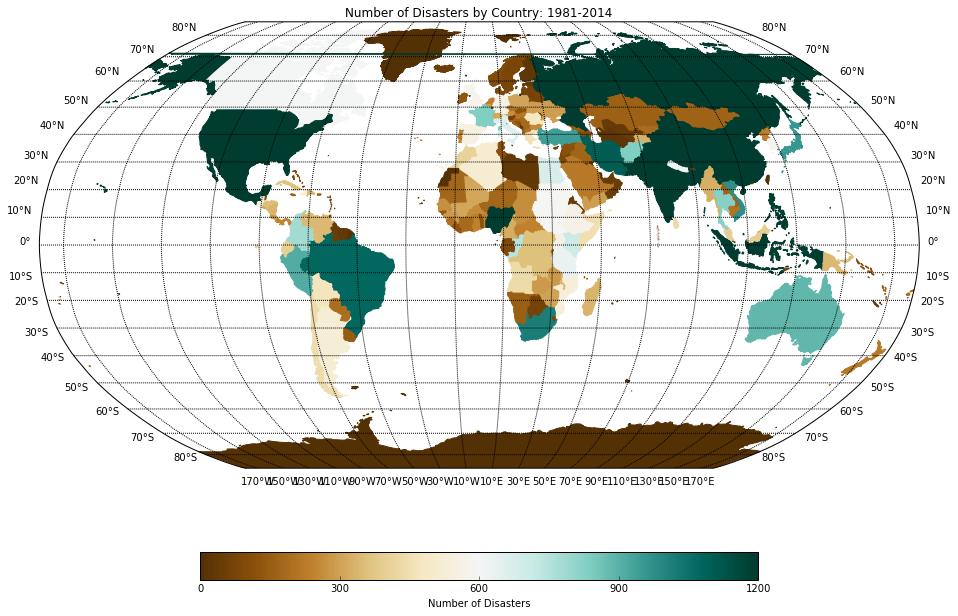

In [89]:
#importing a sequential colorset
from matplotlib.colors import rgb2hex
#setting the figure size
plt.figure(figsize=(20,10))
#iterating through each country in shape file and filling them with color assigned using the colors array
for nshape,seg in enumerate(m.countries):
    #getting x,y co-ordinates
    xx,yy = zip(*seg)
    #getting the corresponding color
    color = rgb2hex(colors[countryisos[nshape]])
    #plotting them on the map
    plt.fill(xx,yy,color,edgecolor=color)
    # set up colorbar:
mm = plt.cm.ScalarMappable(cmap=cmap)
mm.set_array([0,1200]) # Min and Max values of data


plt.colorbar(mm, label="Number of Disasters",
             ticks=[0,300,600,900,1200],# Equirange
             orientation="horizontal", fraction=0.05,
            )
parallels = np.arange(-80.,81,10.)
m.drawparallels(parallels,labels=[True,True,True,True])
#setting the meridians with 20 degree interval from -180 to 180 degrees
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
#setting the title for the plot
plt.title('Number of Disasters by Country: 1981-2014')
plt.show()

From the above plot, lot of insights can be made than the first plot since there is a sequential spread of colours. Some of the insights found are:
> - Very high number of disasters have occurrred in most parts of Asia,United States and parts of Australasia.
- Very low number of disasters near the poles.
- In Africa, all ranges of disasters have occurred since there are multiple colors wide across the range of color bar.
- Other than the Australasian Islands, remaining islands have predominantly less number of disasters.